In [ ]:
''''Assignment #7
Rezwan-Ul-Alam (ID: 2011659042)
Md. Nur Alam Jowel (ID: 2012355042)
Raian Ruku (ID: 2013409642)'''

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras import regularizers
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = np.load("/content/drive/MyDrive/data/handsignX.npy")
y = np.load("/content/drive/MyDrive/data/handsigny.npy").ravel()

In [4]:
train_images_resized = []
for img_array in X:
    img = Image.fromarray(img_array.reshape(20, 20))
    img = img.resize((150, 150), Image.ANTIALIAS)  # Resize to 150x150 pixels
    train_images_resized.append(np.array(img).flatten())

<ipython-input-4-e6bd7a871c56>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((150, 150), Image.ANTIALIAS)  # Resize to 150x150 pixels


In [5]:
X_resized = np.array(train_images_resized)


In [6]:
import json
json_path = '/content/drive/MyDrive/Test/Test/dd.json'


In [7]:
with open(json_path) as f:
    data = json.load(f)
test_images = []
test_labels = []
for filename, image_data in data.items():
    img = Image.open("/content/drive/MyDrive/Test/Test/" + image_data["filename"])
    img = img.convert('L').resize((150, 150))
    img = ImageOps.invert(img)  # Invert the colors
    img_array = np.array(img).flatten()
    test_images.append(img_array)
    test_labels.append(int(image_data["regions"][0]["region_attributes"]["shape"]))




In [8]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

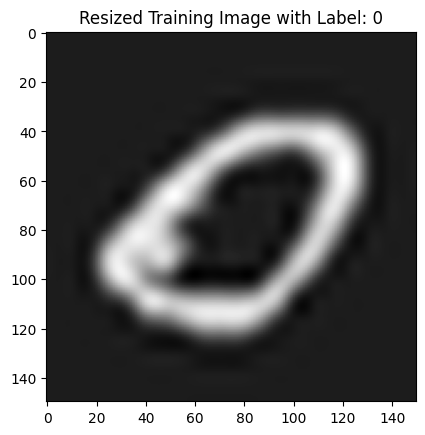

In [9]:
# Display a resized training image
resized_img = X_resized[0].reshape((150, 150))
plt.imshow(resized_img, cmap='gray')
plt.title(f'Resized Training Image with Label: {y[0]}')
plt.show()

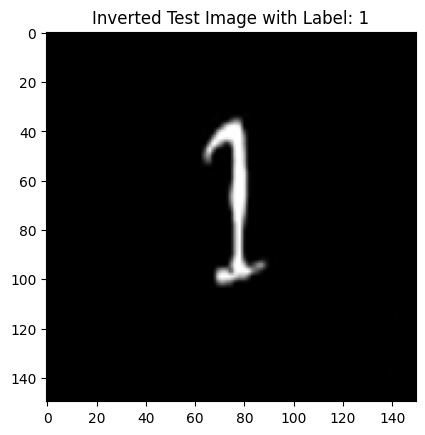

In [10]:
# Display an inverted test image
inverted_img = X_test[1].reshape((150, 150))
plt.imshow(inverted_img, cmap='gray')
plt.title(f'Inverted Test Image with Label: {y_test[1]}')
plt.show()

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_resized)
X_test_std = scaler.transform(X_test)

In [12]:
# Apply PCA and retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_std)
X_test_pca = pca.transform(X_test_std)

# **NN**

In [15]:
nn_model = Sequential(
    [
        InputLayer((X_resized.shape[1],)),
        Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(25, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(15, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(10, activation="linear")
    ]
)

nn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

history = nn_model.fit(X_resized, y, epochs=100)

Epoch 1/100
157/157 [==============================] - 4s 9ms/step - loss: 2.4317 - accuracy: 0.3694
Epoch 2/100
157/157 [==============================] - 1s 9ms/step - loss: 1.6054 - accuracy: 0.5990
Epoch 3/100
157/157 [==============================] - 1s 9ms/step - loss: 1.4108 - accuracy: 0.6654
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 1.3042 - accuracy: 0.6974
Epoch 5/100
157/157 [==============================] - 2s 13ms/step - loss: 1.2295 - accuracy: 0.7260
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 1.2451 - accuracy: 0.7292
Epoch 7/100
157/157 [==============================] - 1s 7ms/step - loss: 1.1900 - accuracy: 0.7454
Epoch 8/100
157/157 [==============================] - 1s 8ms/step - loss: 1.1200 - accuracy: 0.7570
Epoch 9/100
157/157 [==============================] - 1s 7ms/step - loss: 1.1250 - accuracy: 0.7650
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 1.1135 - accu

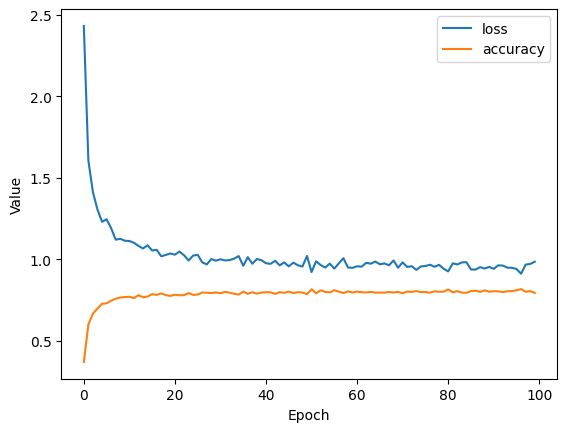

In [16]:
# Visualize training history for both loss and accuracy without PCA
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [20]:
# Convert the list of images to a numpy array
test_images_array = np.array(test_images)

# Make predictions on the test images using your trained model
predictions = nn_model.predict(test_images_array)


7/7 [==============================] - 0s 3ms/step


In [21]:

# Get the predicted class labels (argmax gives the index of the highest probability)
predicted_classes = np.argmax(predictions, axis=1)

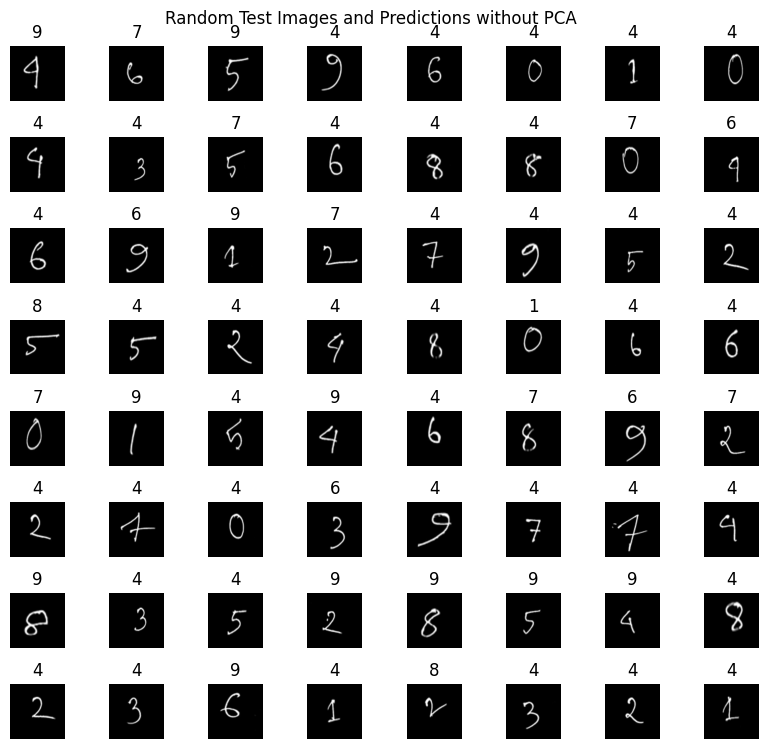

In [32]:
# Plot 64 randomly chosen test images with predictions
num_test_images = len(test_images)
random_indices = np.random.choice(num_test_images, size=64, replace=False)  # Choose 64 random indices

rows, cols = 8, 8  # Define 8x8 matrix

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
fig.tight_layout(pad=0.5, rect=[0, 0.03, 1, 0.95])  # Adjust padding and rectangle for better layout

for i in range(64):
    # Get the randomly chosen index
    random_index = random_indices[i]

    # Get the preprocessed image
    test_image = test_images[random_index]
    # Reshape the image back to 20x20 for plotting
    test_image_reshaped = test_image.reshape((150, 150))

    # Get the predicted class
    predicted_class = predicted_classes[random_index]

    # Get row and column index for current image in the subplot
    row_index = int(i / cols)
    col_index = i % cols

    # Display the image
    axes[row_index, col_index].imshow(test_image_reshaped, cmap='gray')

    # Display the predicted label above the image
    axes[row_index, col_index].set_title(f"{predicted_class}")
    axes[row_index, col_index].set_axis_off()

fig.suptitle("Random Test Images and Predictions without PCA", fontsize=12)
plt.show()

In [33]:
# Test the NN model without PCA
nn_loss, nn_acc = nn_model.evaluate(X_test, y_test)
print("NN Test accuracy without PCA:", nn_acc)


7/7 [==============================] - 0s 5ms/step - loss: 519.2410 - accuracy: 0.0700
NN Test accuracy without PCA: 0.07000000029802322


In [13]:
# Define and train the Neural Network model with PCA
nn_model_pca = Sequential(
    [
        InputLayer((X_pca.shape[1],)),
        Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(25, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(15, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(10, activation="linear")
    ]
)

nn_model_pca.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=['accuracy'])

history_pca = nn_model_pca.fit(X_pca, y, epochs=100)


Epoch 1/100
157/157 [==============================] - 5s 5ms/step - loss: 5.3250 - accuracy: 0.1762
Epoch 2/100
157/157 [==============================] - 1s 3ms/step - loss: 3.2921 - accuracy: 0.2812
Epoch 3/100
157/157 [==============================] - 1s 3ms/step - loss: 2.8575 - accuracy: 0.3782
Epoch 4/100
157/157 [==============================] - 1s 4ms/step - loss: 2.4851 - accuracy: 0.4602
Epoch 5/100
157/157 [==============================] - 1s 3ms/step - loss: 2.2338 - accuracy: 0.5194
Epoch 6/100
157/157 [==============================] - 1s 4ms/step - loss: 1.9746 - accuracy: 0.5788
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 1.7619 - accuracy: 0.6322
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 1.5789 - accuracy: 0.6872
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 1.3937 - accuracy: 0.7264
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 1.2737 - accura

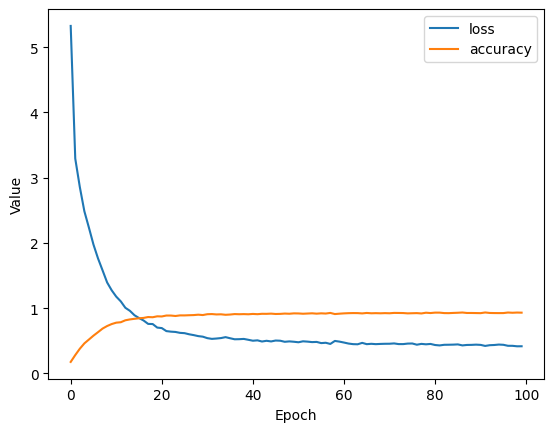

In [19]:
# Visualize training history for both loss and accuracy with PCA
plt.plot(history_pca.history['loss'], label='loss')
plt.plot(history_pca.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [31]:
# Test the NN model with PCA
nn_loss_pca, nn_acc_pca = nn_model_pca.evaluate(X_test_pca, y_test)
print("NN Test accuracy with PCA:", nn_acc_pca)


7/7 [==============================] - 0s 4ms/step - loss: 525.5084 - accuracy: 0.1050
NN Test accuracy with PCA: 0.10499999672174454


# **NB**

In [ ]:
# Classification with Naive Bayes without PCA
nb_model = GaussianNB()
nb_model.fit(X_std, y)
y_pred_nb = nb_model.predict(X_test_std)
nb_acc = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Test accuracy without PCA:", nb_acc)



Naive Bayes Test accuracy without PCA: 0.065


In [ ]:
# Classification with Naive Bayes with PCA
nb_model_pca = GaussianNB()
nb_model_pca.fit(X_pca, y)
y_pred_nb_pca = nb_model_pca.predict(X_test_pca)
nb_acc_pca = accuracy_score(y_test, y_pred_nb_pca)
print("Naive Bayes Test accuracy with PCA:", nb_acc_pca)

Naive Bayes Test accuracy with PCA: 0.09


# **KNN**

In [ ]:
# Classification with K-Nearest Neighbors without PCA
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_std, y)
y_pred_knn = knn_model.predict(X_test_std)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Test accuracy without PCA:", knn_acc)


K-Nearest Neighbors Test accuracy without PCA: 0.075


In [ ]:

# Classification with K-Nearest Neighbors with PCA
knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_pca, y)
y_pred_knn_pca = knn_model_pca.predict(X_test_pca)
knn_acc_pca = accuracy_score(y_test, y_pred_knn_pca)
print("K-Nearest Neighbors Test accuracy with PCA:", knn_acc_pca)

K-Nearest Neighbors Test accuracy with PCA: 0.065


# **SVM**

In [ ]:
# Classification with SVM without PCA
svm_model = SVC(kernel='linear')
svm_model.fit(X_std, y)
y_pred_svm = svm_model.predict(X_test_std)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Test accuracy without PCA:", svm_acc)


SVM Test accuracy without PCA: 0.085


In [ ]:

# Classification with SVM with PCA
svm_model_pca = SVC(kernel='linear')
svm_model_pca.fit(X_pca, y)
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)
svm_acc_pca = accuracy_score(y_test, y_pred_svm_pca)
print("SVM Test accuracy with PCA:", svm_acc_pca)

SVM Test accuracy with PCA: 0.105


# **Per class accuracy **

In [ ]:
print("\nPer-class accuracy for Naive Bayes without PCA:")
print(classification_report(y_test, y_pred_nb))

print("\nPer-class accuracy for Naive Bayes with PCA:")
print(classification_report(y_test, y_pred_nb_pca))

print("\nPer-class accuracy for K-Nearest Neighbors without PCA:")
print(classification_report(y_test, y_pred_knn))

print("\nPer-class accuracy for K-Nearest Neighbors with PCA:")
print(classification_report(y_test, y_pred_knn_pca))

print("\nPer-class accuracy for SVM without PCA:")
print(classification_report(y_test, y_pred_svm))

print("\nPer-class accuracy for SVM with PCA:")
print(classification_report(y_test, y_pred_svm_pca))


Per-class accuracy for Naive Bayes without PCA:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.20      0.05      0.08        20
           4       0.09      0.24      0.13        21
           5       0.00      0.00      0.00        20
           6       0.05      0.10      0.06        20
           7       0.08      0.05      0.06        20
           8       0.20      0.20      0.20        20
           9       0.00      0.00      0.00        20

    accuracy                           0.07       200
   macro avg       0.06      0.06      0.05       200
weighted avg       0.06      0.07      0.05       200


Per-class accuracy for Naive Bayes with PCA:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif